In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

In [5]:
zip_path = '/content/drive/My Drive/horse-or-human.zip'
extract_path = '/content/horse-or-human'

In [6]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Files extracted to: ['horse-or-human']


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
data_dir = '/content/horse-or-human'
datagen = ImageDataGenerator(rescale=1.0/255)
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Check dataset summary
print(train_data.class_indices)

Found 2566 images belonging to 1 classes.
{'horse-or-human': 0}


In [17]:
data_dir = '/content/horse-or-human'

# List contents
print(os.listdir(data_dir))


['horse-or-human']


In [18]:
nested_data_dir = os.path.join(data_dir, 'horse-or-human')
print(os.listdir(nested_data_dir))

['validation', 'train', 'horse-or-human']


In [20]:
import os
import shutil

nested_data_dir = os.path.join(data_dir, 'horse-or-human')

# Move files, skipping any existing folder
for item in os.listdir(nested_data_dir):
    src_path = os.path.join(nested_data_dir, item)
    dest_path = os.path.join(data_dir, item)

    # Skip if destination already exists
    if os.path.exists(dest_path):
        print(f"Skipping existing destination: {dest_path}")
        continue

    shutil.move(src_path, dest_path)

# Remove the now-empty nested folder if no conflicts
try:
    os.rmdir(nested_data_dir)
except OSError as e:
    print(f"Could not remove {nested_data_dir}: {e}")

# Verify the structure
print("Final structure:", os.listdir(data_dir))


Skipping existing destination: /content/horse-or-human/horse-or-human
Could not remove /content/horse-or-human/horse-or-human: [Errno 39] Directory not empty: '/content/horse-or-human/horse-or-human'
Final structure: ['validation', 'train', 'horse-or-human']


In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
data_dir = '/content/horse-or-human'

# List all image files, excluding directories
all_images = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))][:10]

# Display the images
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(all_images):
    img_path = os.path.join(data_dir, img_name)

    # Load and display the image
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)  # Arrange in a grid (2 rows, 5 columns)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name.split('.')[0])  # Optional: Use file name as title

plt.tight_layout()
plt.show()



<Figure size 1000x1000 with 0 Axes>

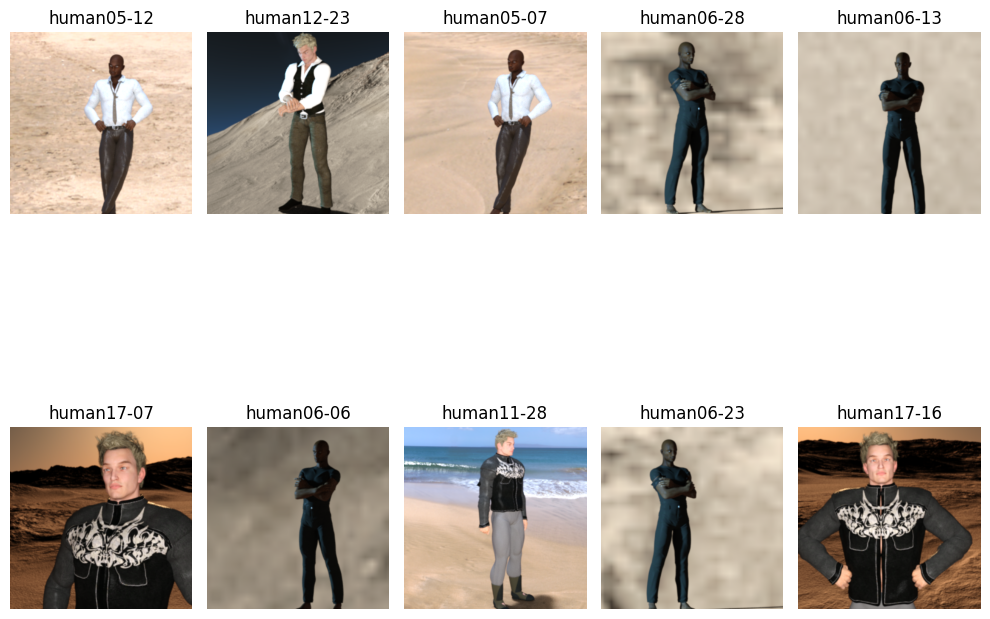

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define subdirectory paths
train_dir = os.path.join(data_dir, 'train')  # Adjust to 'train', 'validation', etc., as needed

# Load images from a specific class (e.g., 'horses')
class_dir = os.path.join(train_dir, 'humans')  # Change 'horses' to other class names if needed
image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))][:10]

# Display images
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(class_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)  # Arrange in a grid (2 rows, 5 columns)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name.split('.')[0])

plt.tight_layout()
plt.show()


In [1]:
local_zip='/content/drive/My Drive/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/horse-or-human')
zip_ref.close()

NameError: name 'zipfile' is not defined